In [3]:
import datetime
today=f"{datetime.datetime.now():%Y-%m-%d_%H-%M}"
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
#imports
import pandas as pd
import pickle as pickle
from scipy.spatial.distance import cdist, pdist, squareform
#import backspinpy
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
from sklearn import preprocessing
import matplotlib.patches as mpatches
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# BC_Lung_bloodVessl

In [ ]:
#Data from BC_Lung_bloodVessl: https://doi.org/10.1038/sdata.2018.160
#feature enrichment and normlization were as discribed in the methods
#refer to (GioeleLa Manno, 2016, doi: 10.1016/j.cell.2016.09.027); (TM Malta,2018, doi: 10.1016/j.cell.2018.03.034); (V Hovestadt, 2019, doi: 10.1038/s41586-019-1434-6); 

In [8]:
mdf_train_set=pd.read_table("normalized_GSE99235_Lung_samples_matrix.txt",index_col=0, header=0, sep="\t")


In [ ]:
#mprotogruop  is cell-type list
bool1 = mprotogruop != nan
mclasses_names, mclasses_index =unique(mprotogruop[bool1], return_inverse=True, return_counts=False)
mtrain_index = mclasses_index
mdf_train_set = mdf_train_set.ix[:,bool1].copy()
mtrain_index[:5]

In [70]:
mtrain_index = mclasses_index.astype(int)
mtrain_index

array([2, 4, 4, ..., 6, 6, 6])

In [72]:
dfex=mdf_train_set.sum(1)
dfex=dfex.loc[dfex!=0]
mdf_train_set=mdf_train_set.loc[dfex.index]
mdf_train_set.shape

(1604, 1209)

# Module

In [75]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import StratifiedShuffleSplit  
from collections import defaultdict
normalizer = 0.9*mdf_train_set.values.max(1)[:,newaxis]
LR = LogisticRegressionCV(Cs=logspace(-10,1,30), refit=True, penalty='l2',
                          solver='newton-cg', fit_intercept=False, multi_class='multinomial',class_weight='balanced',
                          cv=StratifiedShuffleSplit(n_splits=35, test_size=0.25, random_state=12350).split((mdf_train_set.values/normalizer).T,mtrain_index)
                         )

LR.fit((mdf_train_set.values/normalizer).T, 
    mtrain_index.astype(int))

C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\sklearn\utils\optimize.py:195: UserWarning: Line Search failed
  warnings.warn('Line Search failed')
C:\Users\huyiz\AppData\Local\Continuum\anaconda3\envs\py36\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorith

LogisticRegressionCV(Cs=array([1.00000000e-10, 2.39502662e-10, 5.73615251e-10, 1.37382380e-09,
       3.29034456e-09, 7.88046282e-09, 1.88739182e-08, 4.52035366e-08,
       1.08263673e-07, 2.59294380e-07, 6.21016942e-07, 1.48735211e-06,
       3.56224789e-06, 8.53167852e-06, 2.04335972e-05, 4.89390092e-05,
       1.17210230e-04, 2.80721620e-04, 6.72335754e-04, 1.61026203e-03,
       3.85662042e-03, 9.23...
       1.26896100e-01, 3.03919538e-01, 7.27895384e-01, 1.74332882e+00,
       4.17531894e+00, 1.00000000e+01]),
                     class_weight='balanced',
                     cv=<generator object BaseShuffleSplit.split at 0x000001AA4ADE6570>,
                     dual=False, fit_intercept=False, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='multinomial',
                     n_jobs=None, penalty='l2', random_state=None, refit=True,
                     scoring=None, solver='newton-cg', tol=0.0001, verbose=0)

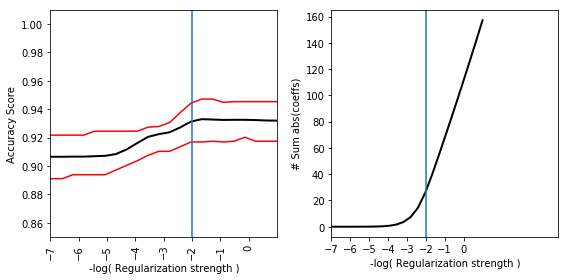

In [4153]:
PlotRegularization strength(CMA=LR.coefs_paths_[1], CSvalues=LR.Cs_,chos=0.01,LRScor=LR.scores_)

## reset the score as 0.01

In [347]:
LR = LogisticRegression(C=0.01, penalty='l2', solver='newton-cg', fit_intercept=False,
                        multi_class='multinomial',class_weight='balanced',random_state=150790)
normalizer = 0.9*mdf_train_set.values.max(1)[:,newaxis]
LR.fit((mdf_train_set.values / normalizer).T, mtrain_index)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='multinomial', n_jobs=None,
                   penalty='l2', random_state=150790, solver='newton-cg',
                   tol=0.0001, verbose=0, warm_start=False)

In [111]:
enrichment_order =['EC1', 'EC2',  'PeriC', 'VFBC', 'VSMC', 'aEC', 'capilEC']
sel_class = 'PeriC'

In [113]:
mwanted_order =['EC1', 'EC2',  'PeriC', 'VFBC', 'VSMC', 'aEC', 'capilEC']
mreorder_ix = [list(mclasses_names).index(i) for i in mwanted_order]
mbool00 = in1d( mclasses_names[mclasses_index],  mwanted_order )
mcolor_dict = pd.read_table("Cell-type_Color_Annotation.txt",index_col=0,header=0,sep="\t")
mcolor_dict = mcolor_dict.map(lambda x: list(map(lambda y: y/255., x)))

In [ ]:
refdataLR=LR.predict_proba((mdf_train_set.values/ normalizer).T)
dataRef=refdataLR[:,mreorder_ix]

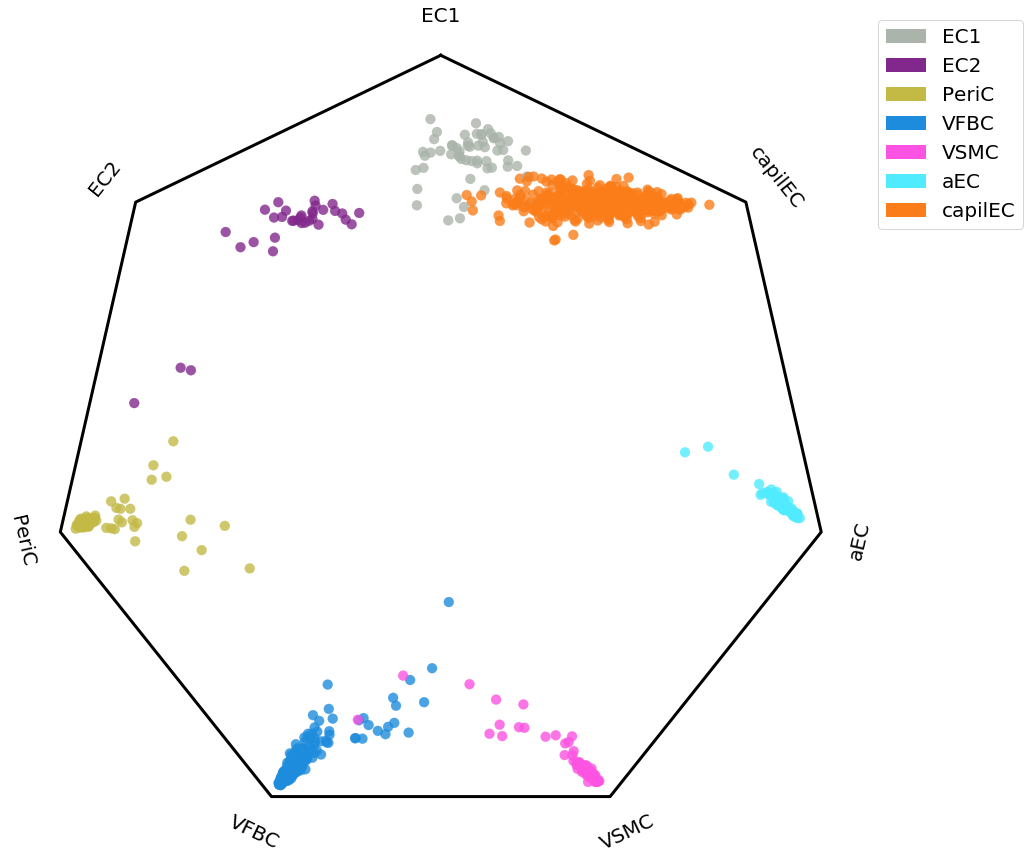

In [114]:
rcParams['savefig.dpi'] = 500

mnewdata,axm = 2020polygonalPlot(refdataLR[:,mreorder_ix], sides=len(mreorder_ix), labels=mclasses_names[mreorder_ix])
2020polygonalPlotprediction (xValue=mnewdata[mbool00,0],yValue=mnewdata[mbool00,1], mnewcolors= array(list(mcolor_dict[mprotogruop].values)), size=100, lw=0.2)


In [115]:
mreordername=[]
for i in mreorder_ix:
    mreordername.append(list(mclasses_names)[i]) 
dfprobRef=pd.DataFrame(dataRef*100, index=mdf_train_set.columns,columns=mreordername)
dfprobRef.head()

,EC1,EC2,PeriC,VFBC,VSMC,aEC,capilEC
Lung.Mural1_A1,0.700525,4.116134,91.789138,0.912365,1.156095,0.773348,0.552395
Lung.Mural1_A6,0.758371,1.157785,2.654193,4.234838,89.089430,1.090778,1.014604
Lung.Mural1_A2,0.864490,0.892450,3.993255,1.668796,91.085910,0.803879,0.691220
Lung.Mural1_A8,1.336846,2.286591,3.006266,2.842494,88.052050,1.167113,1.308639
Lung.Mural1_A7,0.564365,1.124637,2.317402,2.404443,92.032079,0.784394,0.772681


In [121]:
test0=PermutationTest(data=mdf_train_set, LR=LR)

In [122]:
test0.shape

(36270, 7)

In [125]:
thresholdlist=[]
temp=[]
for threshold in np.arange(0.0, 1.0, 0.01):
    thresholdlist.append("Prob_%s%%"%int(threshold*100))
    temp.append((sum(test0>threshold,axis=0)/test0.shape[0]))
ratiodf=pd.DataFrame(temp)
ratiodf.index=thresholdlist
ratiodf.columns=mclasses_names
ratiodf

,EC1,EC2,PeriC,VFBC,VSMC,aEC,capilEC
Prob_0%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Prob_1%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Prob_2%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Prob_3%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999890
Prob_4%,1.000000,1.000000,1.000000,1.000000,1.000000,0.999890,0.998677
Prob_5%,1.000000,1.000000,1.000000,0.999945,1.000000,0.997767,0.985691
Prob_6%,1.000000,0.999835,0.999972,0.996140,1.000000,0.981583,0.933444
Prob_7%,0.999890,0.999200,0.999917,0.967273,0.999917,0.920292,0.822112
Prob_8%,0.999531,0.996995,0.998980,0.871133,0.999007,0.791784,0.654728
Prob_9%,0.998401,0.990984,0.995368,0.689220,0.995148,0.611332,0.477281


In [ ]:
refdataLR=LR.predict_proba((mdf_train_set.values/ normalizer).T)
dataRef=refdataLR[:,mreorder_ix]
rcParams['savefig.dpi'] = 500

mnewdata,axm = 2020polygonalPlot(refdataLR[:,mreorder_ix], sides=len(mreorder_ix), labels=mclasses_names[mreorder_ix])
2020polygonalPlotprediction (xValue=mnewdata[mbool00,0],yValue=mnewdata[mbool00,1], mnewcolors= array(list(mcolor_dict[mprotogruop].values)), size=100, lw=0.2)


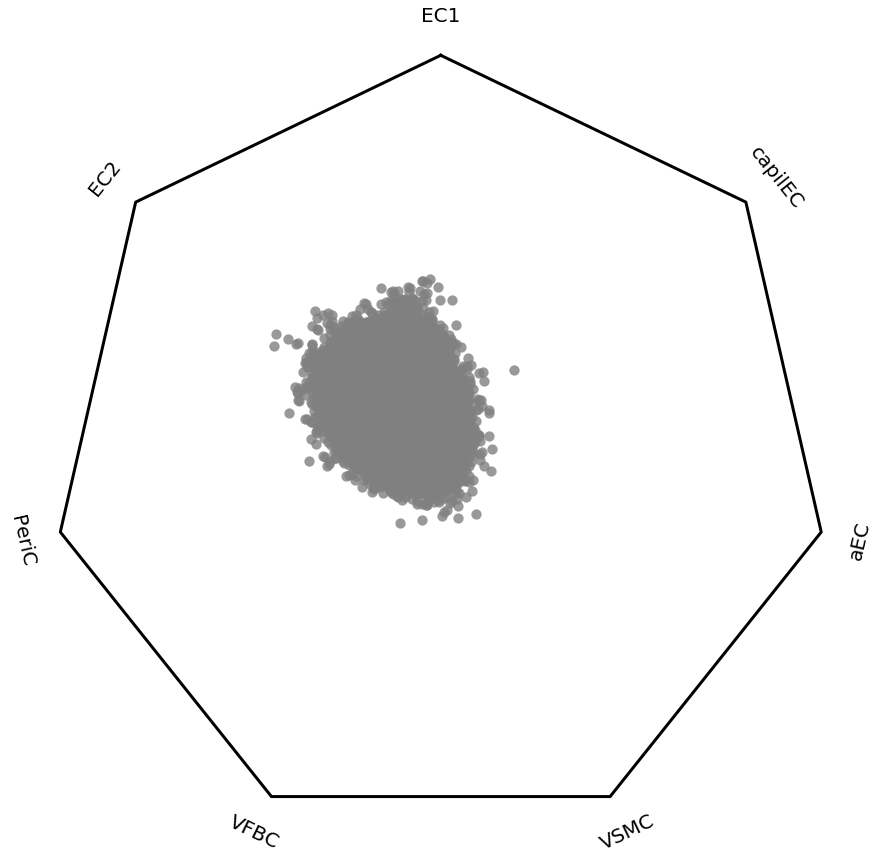

In [134]:
rcParams['savefig.dpi'] = 500
mnewcolors = array(list(mcolor_dict[mprotogruop].values))
refdataLR=test0
mnewdata,axm = polygonalPlot(refdataLR[:,mreorder_ix], sides=len(mreorder_ix), labels=mclasses_names[mreorder_ix])
2020polygonalPlotprediction (xValue=mnewdata[mbool00,0],yValue=mnewdata[mbool00,1], mnewcolors= array(list(mcolor_dict[mprotogruop].values)), size=100, lw=0.2)

plt.savefig("Reference_Negtive_Ctrl.pdf",bbox_inches='tight')

#plt.savefig("WithGBMDGmvGeneTF_DG10x_vs_PEgbm_wheelPlot%sNoNeuron.png"%cvalue,bbox_inches='tight')

In [868]:
dfprobRefperm=pd.DataFrame(test*100, index=mdf_train_set.columns,columns=mreordername)
dfprobRefperm.head()

,EC1,EC2,PeriC,VFBC,VSMC,aEC,capilEC
Lung.Mural1_A1,18.021800,18.851870,15.325649,10.196702,16.561736,9.935198,11.107045
Lung.Mural1_A6,20.647439,21.065778,15.229235,10.224374,14.332687,9.597059,8.903427
Lung.Mural1_A2,24.745715,18.754742,15.739862,8.992066,14.107399,9.082413,8.577803
Lung.Mural1_A8,19.781046,20.590431,15.489568,10.543027,14.974140,9.286011,9.335777
Lung.Mural1_A7,23.352603,18.988717,15.114042,9.873615,14.475190,9.200606,8.995226


In [871]:
#dfprobRefperm.to_csv("Refpermutatoin.txt",sep="\t")

# Prediction

Input prediction data, and repeat LR